In [ ]:
from google.colab import files
uploaded = files.upload()

Saving compiled.csv to compiled.csv


In [ ]:
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
import numpy as np
init_notebook_mode(connected=True)
import plotly.express as px
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['compiled.csv'].decode('utf-8')))

In [ ]:
df.iloc[26:27 ]

,Vendor,PurchaseOrder,Item,Description,Quantity,CancelQuantity,QuantityDemandedFinal,EnteredReceivedQuantity,EarlyDeliveryDate,ReceivedDate,DeliveryTime,RemainingQuantity,PercentOfQuantityReceived,ReturnQuantity,PercentOfQuantityReturned
26,8,49,34,STEM HIP FITMORE A SIZE 4.5,3.0,0.0,3.0,3,2017-05-18,2017-05-09,9,0.0,1.0,2.0,0.666667


In [ ]:
df.info()
# RemainingQty = EnteredReceivedQuantity - QuantityDemandedFinal
# DeliveryTime = EarlyDeliveryDate - ReceivedDate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Vendor                     1503 non-null   int64  
 1   PurchaseOrder              1503 non-null   int64  
 2   Item                       1503 non-null   object 
 3   Description                1503 non-null   object 
 4   Quantity                   1503 non-null   float64
 5   CancelQuantity             1503 non-null   float64
 6   QuantityDemandedFinal      1503 non-null   float64
 7   EnteredReceivedQuantity    1503 non-null   int64  
 8   EarlyDeliveryDate          1503 non-null   object 
 9   ReceivedDate               1503 non-null   object 
 10  DeliveryTime               1503 non-null   int64  
 11  RemainingQuantity          1503 non-null   float64
 12  PercentOfQuantityReceived  1503 non-null   float64
 13  ReturnQuantity             1503 non-null   float

In [ ]:
# Because there are some null values in PercentOfQuantityReturned
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Vendor                     1503 non-null   int64  
 1   PurchaseOrder              1503 non-null   int64  
 2   Item                       1503 non-null   object 
 3   Description                1503 non-null   object 
 4   Quantity                   1503 non-null   float64
 5   CancelQuantity             1503 non-null   float64
 6   QuantityDemandedFinal      1503 non-null   float64
 7   EnteredReceivedQuantity    1503 non-null   int64  
 8   EarlyDeliveryDate          1503 non-null   object 
 9   ReceivedDate               1503 non-null   object 
 10  DeliveryTime               1503 non-null   int64  
 11  RemainingQuantity          1503 non-null   float64
 12  PercentOfQuantityReceived  1503 non-null   float64
 13  ReturnQuantity             1503 non-null   float

In [ ]:
df['EarlyDeliveryDate'] = pd.to_datetime(df['EarlyDeliveryDate'])
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Vendor                     1503 non-null   int64         
 1   PurchaseOrder              1503 non-null   int64         
 2   Item                       1503 non-null   object        
 3   Description                1503 non-null   object        
 4   Quantity                   1503 non-null   float64       
 5   CancelQuantity             1503 non-null   float64       
 6   QuantityDemandedFinal      1503 non-null   float64       
 7   EnteredReceivedQuantity    1503 non-null   int64         
 8   EarlyDeliveryDate          1503 non-null   datetime64[ns]
 9   ReceivedDate               1503 non-null   datetime64[ns]
 10  DeliveryTime               1503 non-null   int64         
 11  RemainingQuantity          1503 non-null   float64       
 12  Percen

In [ ]:
vendor1=df[df['Vendor']==1].count()[0]
vendor2=df[df['Vendor']==2].count()[0]
vendor5=df[df['Vendor']==5].count()[0]
vendor8=df[df['Vendor']==8].count()[0]
Remaining_vendors=df[(df['Vendor']!=1) & (df['Vendor']!=2) & (df['Vendor']!=5) & (df['Vendor']!=8)].count()[0]

trace = go.Bar(x = ["Vendor1","Vendor2","Vendor5","Vendor8","Remaining_Vendors"],y=[vendor1,vendor2,vendor5,vendor8,Remaining_vendors],marker=dict(color=[vendor1,vendor2,vendor5,vendor8,Remaining_vendors],colorscale='Viridis',showscale=True))
data=[trace]
#defining layout
layout = go.Layout(xaxis=dict(title='VendorID'),yaxis=dict(title='Top 4 vendors Vs Remaining_Vendors '),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
figure.update_layout(paper_bgcolor="LightSteelBlue")
figure.show(renderer='colab')

In [ ]:
Vendor1_late=len(df[df['Vendor'] == 1]['DeliveryTime'][df[df['Vendor'] == 1]['DeliveryTime'] < 0])
Vendor1_total=len(df[df['Vendor'] == 1]['DeliveryTime'])
Vendor1_fraction=Vendor1_late/Vendor1_total
Vendor2_late=len(df[df['Vendor'] == 2]['DeliveryTime'][df[df['Vendor'] == 2]['DeliveryTime'] < 0])
Vendor2_total=len(df[df['Vendor'] == 2]['DeliveryTime'])
Vendor2_fraction=Vendor2_late/Vendor2_total
Vendor5_late=len(df[df['Vendor'] == 5]['DeliveryTime'][df[df['Vendor'] == 5]['DeliveryTime'] < 0])
Vendor5_total=len(df[df['Vendor'] == 5]['DeliveryTime'])
Vendor5_fraction=Vendor5_late/Vendor5_total
Vendor8_late=len(df[df['Vendor'] == 8]['DeliveryTime'][df[df['Vendor'] == 8]['DeliveryTime'] < 0])
Vendor8_total=len(df[df['Vendor'] == 8]['DeliveryTime'])
Vendor8_fraction=Vendor8_late/Vendor8_total

In [ ]:
fig1 = go.Figure(data=[
    go.Bar(name='Vendor1', x=['No. of late deliveries (Comparison between top 4 vendors)','Total deliveries (Comparison between top4 vendors)'], y=[Vendor1_late,Vendor1_total]),
    go.Bar(name='Vendor2', x=['No. of late deliveries (Comparison between top 4 vendors)','Total deliveries (Comparison between top4 vendors)'], y=[Vendor2_late,Vendor2_total]),
    go.Bar(name='Vendor5', x=['No. of late deliveries (Comparison between top 4 vendors)','Total deliveries (Comparison between top4 vendors)'], y=[Vendor5_late,Vendor5_total]),
    go.Bar(name='Vendor8', x=['No. of late deliveries (Comparison between top 4 vendors)','Total deliveries (Comparison between top4 vendors)'], y=[Vendor8_late,Vendor8_total])
])
fig1.update_layout(barmode='group',paper_bgcolor="LightSteelBlue")
fig1.show(renderer="colab")

In [ ]:
fig2 = go.Figure(data=[
    go.Bar(name='Vendor1', x=['Fraction of late-deliveries (Comparison between top4 vendors)'], y=[Vendor1_fraction]),
    go.Bar(name='Vendor2', x=['Fraction of late-deliveries (Comparison between top4 vendors)'], y=[Vendor2_fraction]),
    go.Bar(name='Vendor5', x=['Fraction of late-deliveries (Comparison between top4 vendors)'], y=[Vendor5_fraction]),
    go.Bar(name='Vendor8', x=['Fraction of late-deliveries (Comparison between top4 vendors)'], y=[Vendor8_fraction])
])
fig2.update_layout(barmode='group',paper_bgcolor="LightSteelBlue")
fig2.show(renderer="colab")

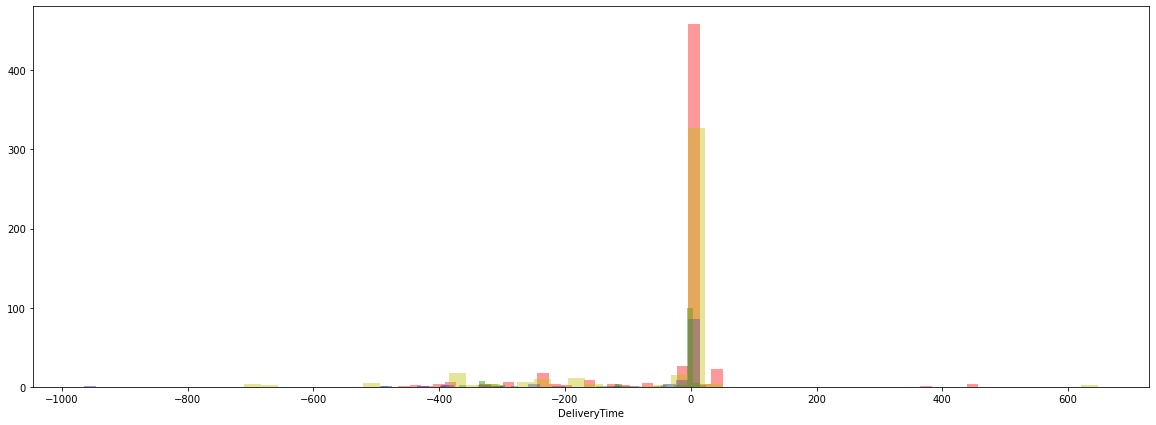

In [ ]:
plt.figure(figsize = (20,7))
sns.distplot(df[df['Vendor'] == 1]['DeliveryTime'], kde = False, color = 'r') #1
sns.distplot(df[df['Vendor'] == 2]['DeliveryTime'], kde = False, color = 'b')  #2
sns.distplot(df[df['Vendor'] == 5]['DeliveryTime'], kde = False, color = 'g')  #3
sns.distplot(df[df['Vendor'] == 8]['DeliveryTime'], kde = False, color = 'y') #4 #worst

In [ ]:
vendorID,count=np.unique(df[df['RemainingQuantity'] < 0]['Vendor'], return_counts = True)
# number of occurences of vendors where the quantities are delivered less then demanded
# 1 -> 43
# 2 -> 6
# 5 -> 4
# 8 -> 32
trace = go.Bar(x = ["Vendor1","Vendor2","Vendor5","Vendor8"],y=[43,6,4,32],marker=dict(color=count,colorscale='Viridis',showscale=True))
data=[trace]
#defining layout
layout = go.Layout(xaxis=dict(title='VendorID'),yaxis=dict(title='Count of top 4 Vendors with less supply '),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
figure.update_layout(
    paper_bgcolor="LightBlue",
)
figure.show(renderer='colab')

In [ ]:
vendor1=df[df['Vendor']==1].count()[0]
vendor2=df[df['Vendor']==2].count()[0]
vendor5=df[df['Vendor']==5].count()[0]
vendor8=df[df['Vendor']==8].count()[0]
Remaining_vendors=df[(df['Vendor']!=1) & (df['Vendor']!=2) & (df['Vendor']!=5) & (df['Vendor']!=8)].count()[0]

trace = go.Bar(x = ["Vendor1","Vendor2","Vendor5","Vendor8","Remaining_Vendors"],y=[vendor1,vendor2,vendor5,vendor8,Remaining_vendors],marker=dict(color=[vendor1,vendor2,vendor5,vendor8,Remaining_vendors],colorscale='Viridis',showscale=True))
data=[trace]
#defining layout
layout = go.Layout(xaxis=dict(title='VendorID'),yaxis=dict(title='Top 4 vendors Vs Remaining_Vendors '),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
figure.update_layout(
    paper_bgcolor="Turquoise",
)
figure.show(renderer='colab')

In [ ]:
fig = px.scatter(df, x="PercentOfQuantityReceived", color="Vendor",
                  hover_data=['Vendor'])
fig.update_layout(
    paper_bgcolor="LightBlue",
)
fig.show(renderer='colab')

In [ ]:
fig = px.scatter(df, x="PercentOfQuantityReceived", color="Vendor",
                  hover_data=['Vendor'])
fig.update_layout(
    paper_bgcolor="LightSteelBlue",
)
fig.show(renderer='colab')

In [ ]:
fig = px.scatter(df, x="DeliveryTime", color="Vendor",
                  hover_data=['Vendor'])
fig.update_layout(
    paper_bgcolor="Turquoise",
)
fig.show(renderer='colab')

In [ ]:
for i in range(df['DeliveryTime'].shape[0]):
    if((df["DeliveryTime"].iloc[i]>0) and (df["DeliveryTime"].iloc[i]<=3)):
        df["DeliveryTime"].iloc[i]=np.log(df["DeliveryTime"].iloc[i])
df['DeliveryTime'] = [x/10 if x>0 else x for x in df.DeliveryTime]

In [ ]:
df['NormDeliveryTime'] = 0-df.DeliveryTime.abs()
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df['NormDeliveryTime'] = scale.fit_transform(df[['NormDeliveryTime']])
fig = px.scatter(df, x="NormDeliveryTime", color="Vendor",
                  hover_data=['Vendor'])
fig.update_layout(
    paper_bgcolor="LightBlue",
)
fig.show(renderer='colab')

In [ ]:
df.head()

,Vendor,PurchaseOrder,Item,Description,Quantity,CancelQuantity,QuantityDemandedFinal,EnteredReceivedQuantity,EarlyDeliveryDate,ReceivedDate,DeliveryTime,RemainingQuantity,PercentOfQuantityReceived,ReturnQuantity,PercentOfQuantityReturned,NormDeliveryTime
0,8,1,9,SCREW BN CANC TI FT 6.5 X 25,10.0,0.0,10.0,10,2016-11-29,2016-11-29,0.000000,0.0,1.0,0.0,0.0,1.000000
1,6,2,15,PORTABLE X-RAY MACHINE,1.0,0.0,1.0,1,2016-12-03,2016-12-03,0.000000,0.0,1.0,0.0,0.0,1.000000
2,3,3,16,XPS 15,1.0,0.0,1.0,1,2016-12-05,2016-12-06,-1.000000,0.0,1.0,0.0,0.0,0.999174
3,2,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1.0,0.0,1.0,1,2016-12-08,2016-12-08,0.000000,0.0,1.0,0.0,0.0,1.000000
4,8,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1.0,0.0,1.0,1,2016-12-16,2016-12-14,0.069315,0.0,1.0,0.0,0.0,0.999943


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Vendor                     1503 non-null   int64         
 1   PurchaseOrder              1503 non-null   int64         
 2   Item                       1503 non-null   object        
 3   Description                1503 non-null   object        
 4   Quantity                   1503 non-null   float64       
 5   CancelQuantity             1503 non-null   float64       
 6   QuantityDemandedFinal      1503 non-null   float64       
 7   EnteredReceivedQuantity    1503 non-null   int64         
 8   EarlyDeliveryDate          1503 non-null   datetime64[ns]
 9   ReceivedDate               1503 non-null   datetime64[ns]
 10  DeliveryTime               1503 non-null   float64       
 11  RemainingQuantity          1503 non-null   float64       
 12  Percen

In [ ]:
df['PercentKept'] = 1-df.PercentOfQuantityReturned
df.head()

,Vendor,PurchaseOrder,Item,Description,Quantity,CancelQuantity,QuantityDemandedFinal,EnteredReceivedQuantity,EarlyDeliveryDate,ReceivedDate,DeliveryTime,RemainingQuantity,PercentOfQuantityReceived,ReturnQuantity,PercentOfQuantityReturned,NormDeliveryTime,PercentKept
0,8,1,9,SCREW BN CANC TI FT 6.5 X 25,10.0,0.0,10.0,10,2016-11-29,2016-11-29,0.000000,0.0,1.0,0.0,0.0,1.000000,1.0
1,6,2,15,PORTABLE X-RAY MACHINE,1.0,0.0,1.0,1,2016-12-03,2016-12-03,0.000000,0.0,1.0,0.0,0.0,1.000000,1.0
2,3,3,16,XPS 15,1.0,0.0,1.0,1,2016-12-05,2016-12-06,-1.000000,0.0,1.0,0.0,0.0,0.999174,1.0
3,2,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1.0,0.0,1.0,1,2016-12-08,2016-12-08,0.000000,0.0,1.0,0.0,0.0,1.000000,1.0
4,8,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1.0,0.0,1.0,1,2016-12-16,2016-12-14,0.069315,0.0,1.0,0.0,0.0,0.999943,1.0


In [ ]:
import datetime as dt

df['ReceivedMonth'] = df['ReceivedDate'].dt.month
df['ReceivedYear'] = df['ReceivedDate'].dt.year


grouped_monthly = df.groupby(['ReceivedYear', 
                              'ReceivedMonth', 
                              'Vendor']).agg(MonthlyNormDeliveryTime = pd.NamedAgg(column = 'NormDeliveryTime', 
                                                                                   aggfunc='mean'), 
                                             MonthlyPercentReceived = pd.NamedAgg(column = 'PercentOfQuantityReceived', 
                                                                                   aggfunc='mean'), 
                                             MonthlyPercentKept = pd.NamedAgg(column = 'PercentKept', 
                                                                                  aggfunc='mean'), 
                                             VendorId = pd.NamedAgg(column = 'Vendor', 
                                                                                  aggfunc='first'))
grouped_monthly.head(60)

MonthlyNormDeliveryTime  ...  VendorId
ReceivedYear ReceivedMonth Vendor                           ...          
2016         1             1                      1.000000  ...         1
                           5                      1.000000  ...         5
             11            1                      0.988981  ...         1
                           5                      0.999174  ...         5
                           8                      0.998347  ...         8
             12            2                      0.999711  ...         2
                           3                      0.999174  ...         3
                           6                      1.000000  ...         6
                           8                      0.999971  ...         8
2017         1             8                      0.999955  ...         8
             2             1                      1.000000  ...         1
                           8                      0.999939  ...         8
             3             2                      0.676033  ...         2
             4             1                      0.999835  ...         1
                           2                      1.000000  ...         2
                           8                      1.000000  ...         8
             5             1                      0.999520  ...         1
                           5                      1.000000  ...         5
                           8                      0.998498  ...         8
                           1005                   1.000000  ...      1005
                           1006                   1.000000  ...      1006
             6             1                      0.999909  ...         1
                           2                      0.999339  ...         2
                           5                      0.999909  ...         5
                           8                      0.999807  ...         8
             7             1                      0.999377  ...         1
                           5                      0.999909  ...         5
             8             1                      0.999127  ...         1
                           3                      1.000000  ...         3
                           5                      0.999922  ...         5
                           8                      1.000000  ...         8
             9             1                      0.998827  ...         1
                           2                      1.000000  ...         2
                           3                      0.999779  ...         3
                           5                      0.998868  ...         5
                           6                      0.999909  ...         6
                           8                      0.999932  ...         8
                           1021                   1.000000  ...      1021
             10            1                      0.999500  ...         1
                           2                      0.999587  ...         2
                           3                      1.000000  ...         3
                           4                      1.000000  ...         4
                           5                      0.995305  ...         5
                           6                      1.000000  ...         6
                           8                      0.999771  ...         8
                           1003                   1.000000  ...      1003
                           1012                   1.000000  ...      1012
                           1021                   1.000000  ...      1021
             11            1                      0.999880  ...         1
                           2                      1.000000  ...         2
                           3                      0.998889  ...         3
                           5                      0.918787  ...         5
                           6           

In [ ]:

import numpy as np
from numpy import linalg as LA

In [ ]:
def Rater(Alternatives):
  length=Alternatives.shape[0]
  matrix=np.ones((length,length))
  for i in range(length):
      if(Alternatives[i]==0):
        Alternatives[i]=0.000000001    #Columns with zero value aren't acceptable in AHP algo ; So just assigned it a close to zero value
      div_array=Alternatives/Alternatives[i]
      for k in range(length):
          matrix[k][i]=div_array[k]
          
  return matrix
    
def Weight(matrix):
  eigen_v,eigen_vec=LA.eig(matrix)
  eigen_v=np.real(eigen_v)
  eigen_vec=np.real(eigen_vec)
  index=np.argmax(eigen_v)
  weight_arr=eigen_vec[:,index]/eigen_vec[:,index].sum()
  return np.abs(weight_arr)

def main(matrix):
    
    criteria=np.array([[1,2,0.5],[0.5,1,1/3],[2,3,1]]) #Need to ask mam about this factors
    w,v=LA.eig(criteria)
    w=np.real(w)
    v=np.real(v)
    
    index=np.argmax(w)
    matrix_b=v[:,index]/v[:,index].sum()
    matrix_b=matrix_b.reshape(-1,1)
    
    
    matrix_1=Rater(matrix[:,0])
    matrix_2=Rater(matrix[:,1])
    matrix_3=Rater(matrix[:,2])
    weight_1=Weight(matrix_1).reshape(-1,1)
    weight_2=Weight(matrix_2).reshape(-1,1)
    weight_3=Weight(matrix_3).reshape(-1,1)
    
    
    matrix_a=np.concatenate((weight_1,weight_2,weight_3),axis=1)
    
    return matrix_a.dot(matrix_b)
    
        
    
        

In [ ]:
Rating_df = df.groupby(['ReceivedYear', 'ReceivedMonth', 'Vendor']).agg(MonthlyNormDeliveryTime = pd.NamedAgg(column = 'NormDeliveryTime', aggfunc='mean'), MonthlyPercentReceived = pd.NamedAgg(column = 'PercentOfQuantityReceived', aggfunc='mean'), MonthlyPercentKept = pd.NamedAgg(column = 'PercentKept', aggfunc='mean'),AHP_Score = pd.NamedAgg(column = 'Vendor', aggfunc='first'),Vendor_Monthly_Score=pd.NamedAgg(column='Vendor',aggfunc='first') ,Month = pd.NamedAgg(column = 'ReceivedMonth', aggfunc='first'),Year = pd.NamedAgg(column = 'ReceivedYear', aggfunc='first'))
Year = Rating_df['Year'].unique()   
Month =Rating_df['Month'].unique()
Vendor=grouped_monthly['VendorId'].unique()
Vendor=np.sort(Vendor)
Month =np.sort(Month)

res = {Vendor[i]: 0 for i in range(len(Vendor))} 
print(res)


Rating_df['Year']=Rating_df['Year'].astype(int)
Rating_df['Month']=Rating_df['Month'].astype(int)

ans=None
ans1=None
for i in Year:
  for j in Month:
    matrix=np.array(Rating_df[(Rating_df['Month']==j) & (Rating_df['Year']==i)][['MonthlyNormDeliveryTime','MonthlyPercentReceived','MonthlyPercentKept']])
    temp=Rating_df[(Rating_df['Month']==j) & (Rating_df['Year']==i)]['AHP_Score']
    if(matrix.shape[0]!=0):
      part_ans=main(matrix)
      maxim=np.max(part_ans)
      ind=[i for i, j in enumerate(part_ans) if j == maxim]
      for k in ind:
          wy=res[temp[k]]+1
          res[temp[k]]=wy
      part_ans1=part_ans/maxim
      if ans is None:
        ans = part_ans
        ans1 = part_ans1
      else:
        ans = np.concatenate(([ans , part_ans ]), axis=0)
        ans1 = np.concatenate(([ans1 , part_ans1 ]), axis=0)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 1003: 0, 1005: 0, 1006: 0, 1007: 0, 1012: 0, 1021: 0, 1025: 0, 1027: 0, 1029: 0, 1034: 0, 1036: 0, 1042: 0, 1043: 0, 1044: 0, 1045: 0, 1046: 0, 1113: 0, 1128: 0, 1130: 0, 1133: 0, 1136: 0}


In [ ]:
x=[]
y=[]
for key, value in res.items():
    x.append("Vendor"+str(key))
    y.append(value)
    
trace = go.Bar(x = x,y=y,marker=dict(color=y,colorscale='Viridis',showscale=True))
data=[trace]
#defining layout
layout = go.Layout(xaxis=dict(title='The count of number of times vendor had the highest score in Month'),yaxis=dict(title='count'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
figure.update_layout(
    paper_bgcolor="Turquoise",
)
figure.show(renderer='colab')

In [ ]:
Rating_df['AHP_Score']=ans
Rating_df['Vendor_Monthly_Score']=ans1
Rating_df.head(60)

MonthlyNormDeliveryTime  ...  Year
ReceivedYear ReceivedMonth Vendor                           ...      
2016         1             1                      1.000000  ...  2016
                           5                      1.000000  ...  2016
             11            1                      0.988981  ...  2016
                           5                      0.999174  ...  2016
                           8                      0.998347  ...  2016
             12            2                      0.999711  ...  2016
                           3                      0.999174  ...  2016
                           6                      1.000000  ...  2016
                           8                      0.999971  ...  2016
2017         1             8                      0.999955  ...  2017
             2             1                      1.000000  ...  2017
                           8                      0.999939  ...  2017
             3             2                      0.676033  ...  2017
             4             1                      0.999835  ...  2017
                           2                      1.000000  ...  2017
                           8                      1.000000  ...  2017
             5             1                      0.999520  ...  2017
                           5                      1.000000  ...  2017
                           8                      0.998498  ...  2017
                           1005                   1.000000  ...  2017
                           1006                   1.000000  ...  2017
             6             1                      0.999909  ...  2017
                           2                      0.999339  ...  2017
                           5                      0.999909  ...  2017
                           8                      0.999807  ...  2017
             7             1                      0.999377  ...  2017
                           5                      0.999909  ...  2017
             8             1                      0.999127  ...  2017
                           3                      1.000000  ...  2017
                           5                      0.999922  ...  2017
                           8                      1.000000  ...  2017
             9             1                      0.998827  ...  2017
                           2                      1.000000  ...  2017
                           3                      0.999779  ...  2017
                           5                      0.998868  ...  2017
                           6                      0.999909  ...  2017
                           8                      0.999932  ...  2017
                           1021                   1.000000  ...  2017
             10            1                      0.999500  ...  2017
                           2                      0.999587  ...  2017
                           3                      1.000000  ...  2017
                           4                      1.000000  ...  2017
                           5                      0.995305  ...  2017
                           6                      1.000000  ...  2017
                           8                      0.999771  ...  2017
                           1003                   1.000000  ...  2017
                           1012                   1.000000  ...  2017
                           1021                   1.000000  ...  2017
             11            1                      0.999880  ...  2017
                           2                      1.000000  ...  2017
                           3                      0.998889  ...  2017
                           5                      0.918787  ...  2017
                           6                      0.996281  ...  2017
                           8                      0.999372  ...  2017
                           1003                   0.999587  ...  2017
                           1021              

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X=Rating_df[['MonthlyNormDeliveryTime',	'MonthlyPercentReceived',	'MonthlyPercentKept']]
y=Rating_df['Vendor_Monthly_Score']
X_train, X_test, y_train, y_test = train_test_split(X,y )
model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
r2_score(y_test,predictions)

[13:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9687782402506689

In [ ]:


rating = RandomForestRegressor(n_estimators=200,max_depth=5, random_state=0)
rating.fit(Rating_df[['MonthlyNormDeliveryTime',	'MonthlyPercentReceived',	'MonthlyPercentKept']],Rating_df['Vendor_Monthly_Score'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rating.score(Rating_df[['MonthlyNormDeliveryTime',	'MonthlyPercentReceived',	'MonthlyPercentKept']],Rating_df['Vendor_Monthly_Score'])

0.9552971221176534

In [ ]:
fig4 = px.scatter_3d(grouped_monthly, x='MonthlyPercentReceived', y='MonthlyNormDeliveryTime', z='MonthlyPercentKept',
                     color='VendorId')
fig4.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig4.show(renderer='colab')

*Categorization* of orders into performing and non-performing along with the reason. (Promptness, Quantity, Quality)

In [ ]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters = 4)
cls_assignment = cls.fit_predict(grouped_monthly[['MonthlyPercentReceived',
                                                  'MonthlyNormDeliveryTime',
                                                  'MonthlyPercentKept']])
grouped_monthly['label'] = cls_assignment

In [ ]:
trace1=go.Scatter3d(
    x=grouped_monthly[grouped_monthly['label']==0]['MonthlyPercentReceived'],
    y=grouped_monthly[grouped_monthly['label']==0]['MonthlyNormDeliveryTime'],
    z=grouped_monthly[grouped_monthly['label']==0]['MonthlyPercentKept'],
    mode='markers',
    marker=dict(
        size=12,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
     hovertemplate= '<b>Quantity</b>: %{x:.2f}' +
                        '<br><b>Promptness</b>: %{y}<br>' +
                        '<b>Quality</b> : %{z}',
    name="Performing-Vendors"
)
layout = go.Layout(scene = dict(
                    xaxis_title='Quantity',
                    yaxis_title='Promptness',
                    zaxis_title='Quality'))
trace2=go.Scatter3d(
    x=grouped_monthly[grouped_monthly['label']==1]['MonthlyPercentReceived'],
    y=grouped_monthly[grouped_monthly['label']==1]['MonthlyNormDeliveryTime'],
    z=grouped_monthly[grouped_monthly['label']==1]['MonthlyPercentKept'],
    mode='markers',
    marker=dict(
        size=12,
        color='yellow',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
    hovertemplate= '<b>Quantity</b>: %{x:.2f}' +
                        '<br><b>Promptness</b>: %{y}<br>' +
                        '<b>Quality</b> : %{z}',
    name="Non-Performing-Vendors(Due to Quantity issue)"
)
trace3=go.Scatter3d(
    x=grouped_monthly[grouped_monthly['label']==2]['MonthlyPercentReceived'],
    y=grouped_monthly[grouped_monthly['label']==2]['MonthlyNormDeliveryTime'],
    z=grouped_monthly[grouped_monthly['label']==2]['MonthlyPercentKept'],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
    hovertemplate= '<b>Quantity</b>: %{x:.2f}' +
                        '<br><b>Promptness</b>: %{y}<br>' +
                        '<b>Quality</b> : %{z}',
    name="Non-Performing-Vendors(Due to Quality issue)"
)
trace4 =go.Scatter3d(
    x=grouped_monthly[grouped_monthly['label']==3]['MonthlyPercentReceived'],
    y=grouped_monthly[grouped_monthly['label']==3]['MonthlyNormDeliveryTime'],
    z=grouped_monthly[grouped_monthly['label']==3]['MonthlyPercentKept'],
    mode='markers',
    marker=dict(
        size=12,
        color='green',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
    hovertemplate= '<b>Quantity</b>: %{x:.2f}' +
                        '<br><b>Promptness</b>: %{y}<br>' +
                        '<b>Quality</b> : %{z}',
    name="Non-Performing-Vendors(Due to Promptness issue)"
)
data=[trace1,trace2,trace3,trace4]


fig2 = go.Figure(data,layout)

fig2.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig2.show(renderer='colab')


In [ ]:
grouped = grouped_monthly.groupby("VendorId")
vendor_output = pd.DataFrame(columns=['Vendor_ID', 'Performance', 'Performance_Percent','UnderPerformance (Quality)', 'UnderPerformance (Quantity)', 'UnderPerformance (Promptness)'])
for name, group in grouped:
    values = group['label'].value_counts()
    values1 = values
    for i in range(0,4):
        if i not in values1.index:
            values1[i] = 0
    total = np.sum(group['label'].value_counts())

    for i,value in enumerate(values):
        values1[values[values == value].index] = value/total

    maxperc_index = values1[values1 == np.max(values1)].index[0]
    mydict = {0:'Performing', 1: 'Quality Issue', 2: 'Quantity Issue', 3: 'Promptness Issue'}
    
    if maxperc_index == 0 and values1[maxperc_index] < 0.75:
            maxperc_index = values1.sort()[-2].index[0]
    
    vendor_output = vendor_output.append({'Vendor_ID': group['VendorId'][group['VendorId'].first_valid_index()],'Performance': mydict[maxperc_index], 'Performance_Percent': values1[0],'UnderPerformance (Quantity)': values1[2],'UnderPerformance (Promptness)' : values1[3], 'UnderPerformance (Quality)': values1[1]}, ignore_index=True)
vendor_output

,Vendor_ID,Performance,Performance_Percent,UnderPerformance (Quality),UnderPerformance (Quantity),UnderPerformance (Promptness)
0,1,Performing,0.942857,0.0,0.057143,0.000000
1,2,Performing,0.863636,0.0,0.090909,0.045455
2,3,Performing,0.933333,0.0,0.066667,0.000000
3,4,Performing,1.000000,0.0,0.000000,0.000000
4,5,Performing,0.875000,0.0,0.083333,0.041667
5,6,Performing,0.857143,0.0,0.000000,0.142857
6,7,Performing,1.000000,0.0,0.000000,0.000000
7,8,Performing,0.939394,0.0,0.030303,0.030303
8,9,Performing,1.000000,0.0,0.000000,0.000000
9,1003,Performing,0.882353,0.0,0.058824,0.058824


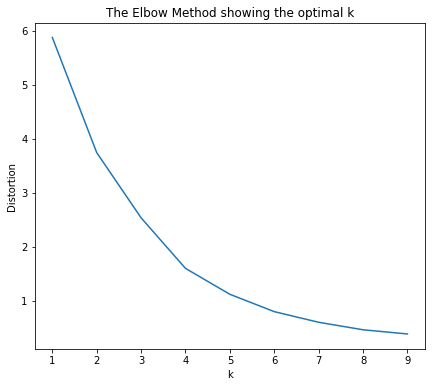

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(grouped_monthly[['MonthlyPercentReceived','MonthlyNormDeliveryTime','MonthlyPercentKept']])
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(7,6))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()#curve straightens out at 4, so optimal =4

In [ ]:
count1 = vendor_output['Performance'].value_counts()[0]
count2 = vendor_output['Performance'].value_counts()[1]
count3 = vendor_output['Performance'].value_counts()[2]
count4 = 0

In [ ]:
label=["Performing_vendors","Non-Performing_vendors_Promptness","Non-Performing_vendor_Quality","Non-Performing_vendors_Quantity"]
trace = go.Bar(x = label,y=[count1,count2,count3,count4],marker=dict(color=[count1,count2,count3,count4],colorscale='Viridis',showscale=True))
data=[trace]
#defining layout
layout = go.Layout(xaxis=dict(title='Clustering-Output'),yaxis=dict(title='Count'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
figure.show(renderer='colab')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
X = grouped_monthly[['MonthlyPercentReceived','MonthlyNormDeliveryTime','MonthlyPercentKept']]
y = grouped_monthly['label']
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf.fit(X_train,y_train)
print(pd.Series(clf.predict(X)).value_counts())
print(grouped_monthly.label.value_counts())
clf.score(X_train,y_train),clf.score(X_test,y_test)
pred = clf.predict(X_test)
results = confusion_matrix(y_test, pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, pred)) 
print('Report : ')
print(classification_report(y_test, pred)) 

0    177
2     13
3      6
1      3
dtype: int64
0    177
2     13
3      6
1      3
Name: label, dtype: int64
Confusion Matrix :
[[46  0  0]
 [ 0  3  0]
 [ 0  0  1]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
!setup.py

/bin/bash: setup.py: command not found
